# What do we need to know today to create a baseline AI model?

## Scenario / AI use case
- A colleague would like to understand if AI could be used to automatically diagnose breast cancer (malignant) and not breast cancer (benign) from images of fine needle aspirates (FNAs) of breast masses.
- They have already found some data they they would like you to work with.
- They would like to use this AI tool at their own health centre to support clinicians to diagnore breast cancer.

## Skilled team
- Everyone on the call
- Can be made up of subject matter experts e.g. clinicians; data engineers; data scientists; AI specialists; machine learning engineers; business analysts; project managers, and users e.g. patients

## Data
- Publicly avaliable data from Wolberg, William, et al. "Breast Cancer Wisconsin (Diagnostic)." UCI Machine Learning Repository, 1993, https://doi.org/10.24432/C5DW2B.
- More information below.

## AI algorithms
- Linear Support Vector Classifier.
- More information below.

# 1. Agree full project with clients/customers/users, including scope, timeframe and specific plan.

## 1.1. Data
- We have agreed to use publicly avaliable data from Wolberg, William, et al. "Breast Cancer Wisconsin (Diagnostic)." UCI Machine Learning Repository, 1993, https://doi.org/10.24432/C5DW2B.
The original research paper can be seen here https://minds.wisconsin.edu/bitstream/handle/1793/59692/TR1131.pdf
- 569 fine needle aspirations (FNAs) were taken. For each FNA, the aspirated material was expressed onto a glass slide and stained. A physician then decided what part of the glass slide was digitised as an image.
- Each image was then annotated with approximate initial boundaries of enough nuclei to provide a respesentative sample.
- Then their system smoothed out the nuclei boundaries and summarised all of the nuclei with 30 features such as mean radius, mean perimeter and mean area.
- From the way the research paper is worded, it is assumed that each FNA is from a different person, however, this is not explicity said.

![fine_needle_aspiration.png](images/fine_needle_aspiration.png)

Source: https://my.clevelandclinic.org/health/diagnostics/17872-fine-needle-aspiration-fna

![approximate_cell_nuclei.png](images/approximate_cell_nuclei.png)

Source: https://doi.org/10.24432/C5DW2B

![smoothed_cell_nuclei.png](images/smoothed_cell_nuclei.png)

Source: https://doi.org/10.24432/C5DW2B

### 1.1.1. Features
>Features are the values that a supervised model uses to predict the label...
>
>In a weather model that predicts rainfall, the features could be latitude, longitude, temperature, humidity, cloud coverage, wind direction, and atmospheric pressure.

Source: https://developers.google.com/machine-learning/intro-to-ml/supervised

- The 30 features we are using represents a summary of the nuclei boundaries on each image such as mean radius, mean perimeter and mean area.

For example:

![features.png](images/features.png)

### 1.1.2. Targets or labels

- Targets or labels are "the 'answer,' or the value we want the model to predict."
- "In a weather model that predicts rainfall,... the label would be rainfall amount." Or could be Yes/No for email spam detection, or 0/1.
Source: https://developers.google.com/machine-learning/intro-to-ml/supervised

- The targets we are using are 0 and 1 which represents whether the tumour associated with the image is cancerous (=0) or non-cancerous (=1).

For example:

![targets.png](images/targets.png)


### 1.1.3. Is the data suitable for this task?
Normally, this would be agreed by the whole project team.

- What does a row of data represent? Is each row a different person? Is each row a different image or just a different shape within an image?
- How was the data collected? Was the same device used? Is there any bias in how the data was collected? Will the model likely work well on other data? 
- Who cleaned the data? Has this been validated?/Is it correct?
- Who did the labelling? Was this validated?
- Is the data representative of who this AI tool will be used on? Will the tool work for everyone or are there groups of people where the tool performs worse?
- Ultimately, we want the model which uses the data to be valid, reliable and generalisable. For more information, see https://www.healthknowledge.org.uk/content/validity-reliability-and-generalisability


## 1.2. Agreed to do

### 1.2.1. Baseline AI model

“Baseline models are basic models that are used as a foundation for more complicated models.
They are a benchmark against which more complex models may be evaluated.”

Source: https://www.deepchecks.com/glossary/baseline-models/

- Let's assume there aren't any models that use this data for this task.

### 1.2.2. Model creation plan:

- a) Train and test split
- b) Train model using chosen algorithm and train data only
- c) Evaluate the model using test data

# 2. Develop the model

## 2.1. Import chosen libraries

- To learn more about sklearn, search the package names on their official website https://scikit-learn.org/stable/index.html
- To learn more about pandas, search their official website https://pandas.pydata.org/docs/
- To learn more about matplotlib, search their official website https://matplotlib.org/stable/search.html

In [2]:
#to manipulate data tables
import pandas as pd

#to load the breast cancer data
from sklearn.datasets import load_breast_cancer

#to perform splitting the data into a train set and test set
from sklearn.model_selection import train_test_split

#to perform linear support vector classification
from sklearn.svm import LinearSVC

#to show graphs of the data
import matplotlib.pyplot as plt

# to show a chart of the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

## 2.2. Set the seed state, or `random_state`

>Pseudo Random Number Generator(PRNG) refers to an algorithm that uses mathematical formulas to produce sequences of random numbers...
>
>A PRNG starts from an arbitrary starting state using a seed state.
>
>Many numbers are generated in a short time and can also be reproduced later, if the starting point in the sequence is known. Hence, the numbers are deterministic and efficient.

Source: https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/

>Setting a `random_state` ensures that the results are reproducible.

Source: https://www.geeksforgeeks.org/what-is-scikit-learn-random-state-in-splitting-dataset/

In [3]:
chosen_random_state = 2541

## 2.3. Load the data

The data can be loaded from the Python library sklearn.

- `return_X_y=True` just returns the image data and the cancer classification of malignant (represented as 0) or benign (represented as 1)
- `as_frame=True` returns both datasets as a pandas DataFrame and Series

Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [4]:
data = load_breast_cancer(return_X_y=True, as_frame=True)

In [5]:
print(f"data has {type(data)} and there are {len(data)} items")

data has <class 'tuple'> and there are 2 items


In [6]:
#the first item, which has index 0 is the image data
x = data[0]

#the second item, which has index 1 is the cancer classification
y = data[1]

In [7]:
#this is the three rows of x, the image data 
x.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [8]:
#this is the three rows of y, the cancer classification 
y.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [9]:
#there are 357 benign cases (represented as 1) and 212 malignant cases (represented as 0)
y.value_counts()

target
1    357
0    212
Name: count, dtype: int64

## 2.4. Train/test split

>Data splitting is a commonly used approach for model validation, where we split a given dataset into two disjoint sets: training and testing. The statistical and machine learning models are then fitted on the training set and validated using the testing set. By holding out a set of data for validation separate from training, we can evaluate and compare the predictive performance of different models without worrying about possible overfitting on the training set.
>
>...
>
>The foregoing data splitting methods can be implemented once we specify a splitting ratio. A commonly used ratio is 80:20, which means 80% of the data is for training and 20% for testing. Other ratios such as 70:30, 60:40, and even 50:50 are also used in practice. There does not seem to be clear guidance on what ratio is best or optimal for a given dataset. The 80:20 split draws its justification from the well-known Pareto principle, but that is again just a thumb rule used by practitioners.

Source: https://onlinelibrary.wiley.com/doi/10.1002/sam.11583

For example, we could split a dataset into train and test based on time period. In this example, it is currently 2016. We use data from 2011 to 2015 to train the model and withold data from 2015 to 2016. We are pretending that the model was created in 2015 so that we know for sure what happens in the future, which is our test set.

![train_test.png](images/train_test.png)

There are different methods to split the data, depending on the data being used and the problem but for simplicity for this short session, we will use the sklearn defaults.

In [10]:
x_train, x_test, y_train, y_test = train_test_split( # this function splits x and y data into 4 parts. The first two are where the features, or x, are split into train and test. The second two are where the targets, or y, are split into train and test.
                                                    x, # this is the features data 
                                                    y, # this is the target data
                                                    test_size=0.2, # this is the percentage of data that will be sectioned off in the test set so the train set will have 80% of the data and the test set will have 20%
                                                    random_state=chosen_random_state # this is the seed state or random state, see section 2.2. for more information
                                                    )

In [11]:
print(f"""x shape is {x.shape} which is (number of rows, columns)
y shape is {y.shape}. Where there is no value, this represents 1. For example, y has 1 column

x_train shape is {x_train.shape} which is (number of rows, columns). {len(x_train)} is 80% of the data. 
y_train shape is {y_train.shape}. Where there is no value, this represents 1. For example, y has 1 column
      
x_test shape is {x_test.shape}. {len(x_test)} is 20% of the data.
y_test shape is {y_test.shape}. Where there is no value, this represents 1. For example, y has 1 column""")

x shape is (569, 30) which is (number of rows, columns)
y shape is (569,). Where there is no value, this represents 1. For example, y has 1 column

x_train shape is (455, 30) which is (number of rows, columns). 455 is 80% of the data. 
y_train shape is (455,). Where there is no value, this represents 1. For example, y has 1 column
      
x_test shape is (114, 30). 114 is 20% of the data.
y_test shape is (114,). Where there is no value, this represents 1. For example, y has 1 column


## 2.5. Model training

There are many different algorithms you can use to create a baseline model. We are doing a binary classification so would need a model that could do classification. More information on choosing a suitable algorithm can be found here https://www.geeksforgeeks.org/choosing-a-suitable-machine-learning-algorithm/

Normally we would check to see if others had already tried to solve this problem or a similar problem so we don't duplicate work and we learn from others. We assumed there aren't any models that use this data for this task.

Arbitrarily, linear support vector classifier has been chosen as the algorithm. This uses straight (linear) lines or hyperplanes to separate the data into the two classes or labels.

For example, the hyperplane shown in the chart below separates Class 1 and Class 2. Points to the left of the hyperplane would be predicted as Class 2. Points to the right of the hyperplane would be predicted as Class 1.

![linear_svc.png](images/linear_svc.png)

Source: https://www.ibm.com/topics/support-vector-machine

There are different settings, or hyperparameters, for the algorithm that are set by us. For simplicity, we will use the sklearn defaults.

More information about this algorithm and its hyperparameters can be found through the links:
- https://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf
- https://www.ibm.com/topics/support-vector-machine
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
- https://www.analyticsvidhya.com/blog/2021/04/insight-into-svm-support-vector-machine-along-with-code/
- https://link.springer.com/protocol/10.1007/978-1-60327-241-4_13 (if you are able to gain access)

In [12]:
# the model is only trained from the train set
# we use the chosen random state to make sure that our results are replicatable
# we only need one line to train the model!
linear_svc_model = LinearSVC(random_state=chosen_random_state).fit(x_train, y_train)

# 3. Model evaluation

We use the trained model and the test set to check how well the model performs on "unseen" data.

We need to quanitify "how well" the model performs. As we are doing supervised binary classification, we can use evaluation metrics such as accuracy, sensitivity, recall, specificity, precision and F-score. The most suitable evaluation metrics we choose depends on the specific problem we are looking to solve with the model and what our data looks like.

The evalution metrics mentioned can be calculated from what is called a confusion matrix. More information on how to calculate evaluation metrics from the confusion matrix can be found here https://www.nature.com/articles/s41598-024-56706-x

For example, in the confusion matrix below, there were 25 items (12 + 10 + 2 + 1) that were predicted.
- From the 25 that were predicted, the model got 22 correct (12 + 10).
- Out of 13 items (12 + 1) with actual label 0, 12 items (top left) were correctly predicted and 1 item (top right) was incorrectly predicted.
- Out of 12 items (2 + 10) with actual label 1, 10 items (bottom right) were correctly predicted and 2 items (bottom left) were incorrectly predicted.

![confusion_matrix_example.png](images/confusion_matrix_example.png)

Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

An example of how the confusion matrix can be used to calculate evaluation metrics can be seen below:

![confusion_matrix.png](images/confusion_matrix.png)

Source: https://www.kdnuggets.com/2022/11/confusion-matrix-precision-recall-explained.html

More information about confusion matrices can be found here https://www.analyticsvidhya.com/articles/confusion-matrix-in-machine-learning/

At this stage, these evaluation metrics may not tell you the full story of what the model is doing. You may want to do more analysis and check if the model is biased. For example, are there groups of people who the model performs worse for? More information about types of bias can be found here https://developers.google.com/machine-learning/crash-course/fairness/types-of-bias

In [13]:
# these are the actual classifications
print("actual/true labels:")
y_test.values

actual/true labels:


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0])

In [14]:
# using the trained model AND the test set, these show the predictions for the test set
print("predicted labels:")
pred_y_test = linear_svc_model.predict(x_test)
pred_y_test

predicted labels:


array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0])

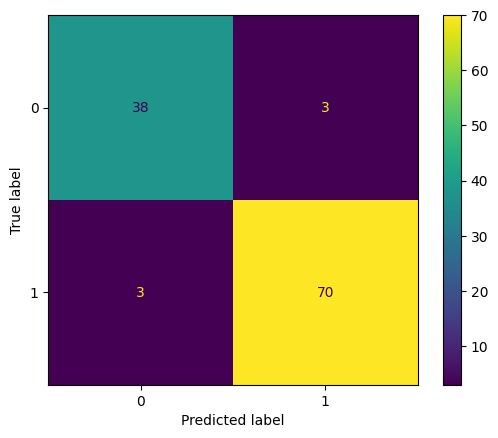

In [15]:
# this is a chart of the confusion matrix
ConfusionMatrixDisplay.from_estimator(linear_svc_model, x_test, y_test)
plt.show()

percentage of total count:
e.g. 0.36 represents 36 percent


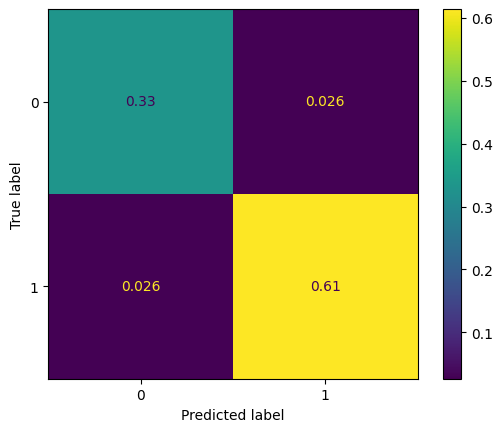

In [16]:
# this is a chart of the confusion matrix but displayed as a percentage of the total number of items
print("""percentage of total count:
e.g. 0.36 represents 36 percent""")

ConfusionMatrixDisplay.from_estimator(linear_svc_model, x_test, y_test, normalize="all")
plt.show()